In [1]:
%matplotlib ipympl

from typing import Tuple
import mpl_interactions.ipyplot as iplt
import matplotlib.pyplot as plt
from mpl_point_clicker import clicker
import json
import numpy as np
import pandas as pd
import ipywidgets as widgets
from geopy.distance import geodesic
from geopy.point import Point

In [2]:
df = pd.read_csv("0000039_GPS.log")
with open('messpunkte.json', 'r') as f:
    messpunkte = json.load(f)
    f.close()

In [3]:
dfs = {}
for messpunkt_name, value in messpunkte.items():
        dfs[messpunkt_name]=df[df['TimeUS'].between(int(value['start'] * 10e3),
                                       int(value['end'] * 10e3))]

In [4]:
def draw_plot(name):
    df=dfs[name]
    fig, ax = plt.subplots()
    klicker = clicker(
       ax,
       ["Point"],
       markers=["x"],
        **{"linestyle": "--"}
    )
    ax.set_xlabel('Lat')
    ax.set_ylabel('Lng')
    ax.ticklabel_format(useOffset=False)
    
    label_format = '{:,.7f}'
    ax.grid()
    fig.canvas.header_visible = False
    ax.set_title(f'{name}')
    plt.margins(0.1)
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)
    fig.subplots_adjust(bottom=0.2)
    lines = ax.plot(df['Lat'], df['Lng'])
    controls = iplt.plot(df['Lat'], df['Lng'])
    fig.tight_layout()
    return fig, ax, klicker

In [5]:
def calculate_distance(point1, point2):
    return geodesic(point1, point2).meters

In [6]:
def calculate_midpoint(point1, point2):
    midpoint = Point((point1[0] + point2[0])/2, (point1[1] + point2[1])/2)
    return midpoint

In [9]:
def add_widgets(name):
    fig, ax, klicker = draw_plot(name)
    out = widgets.Output()
    display(out)
    global text
    text = {}
    @out.capture()
    def point_added_cb(position: Tuple[float, float], klass: str):
        if len(klicker.get_positions()['Point']) != 2:
            return
        distance = np.round(calculate_distance(klicker.get_positions()['Point'][0],
                                klicker.get_positions()['Point'][1]), 3)
        midpoint = calculate_midpoint(klicker.get_positions()['Point'][0], 
                                      klicker.get_positions()['Point'][1])
        global text
        text[name] = ax.text(midpoint[0], midpoint[1], f'{str(distance)}m')
 
    @out.capture()
    def point_removed_cb(position: Tuple[float, float], klass: str, idx):
        if len(klicker.get_positions()['Point']) != 1:
            return
        global text
        text[name].remove()
 
    klicker.on_point_added(point_added_cb)
    klicker.on_point_removed(point_removed_cb)
    plt.show()
    return fig, ax, klicker

VBox()

Output()

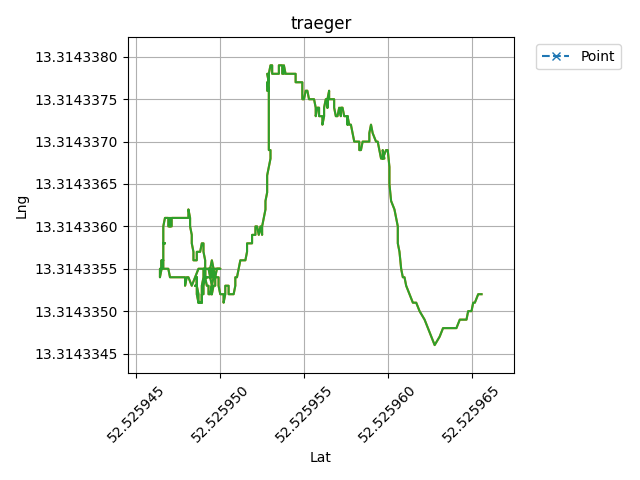

VBox()

Output()

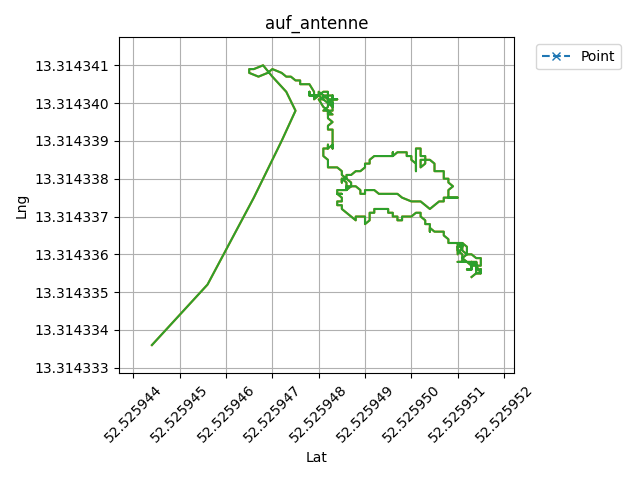

VBox()

Output()

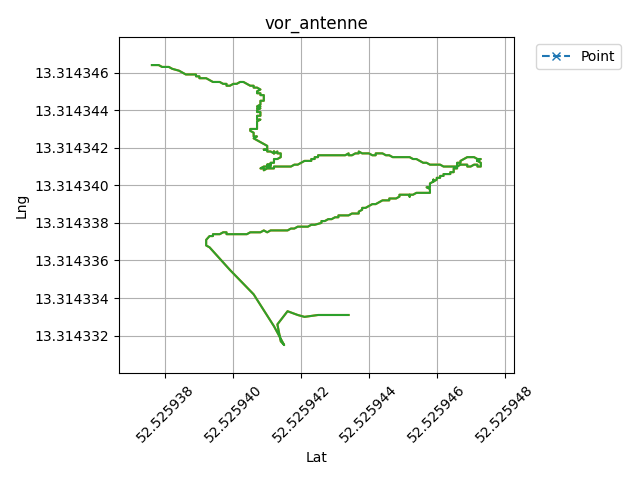

VBox()

Output()

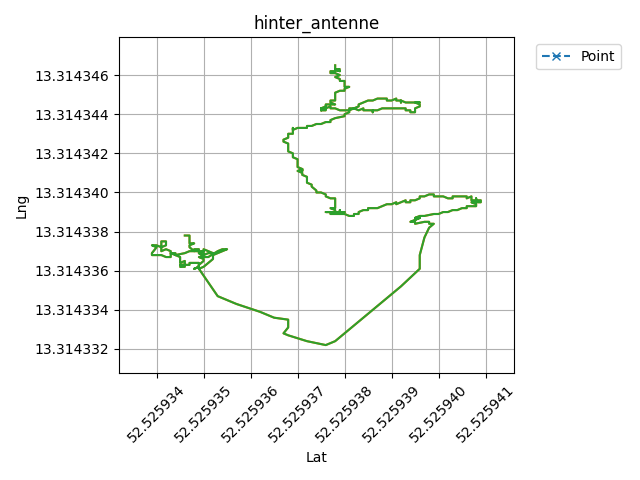

VBox()

Output()

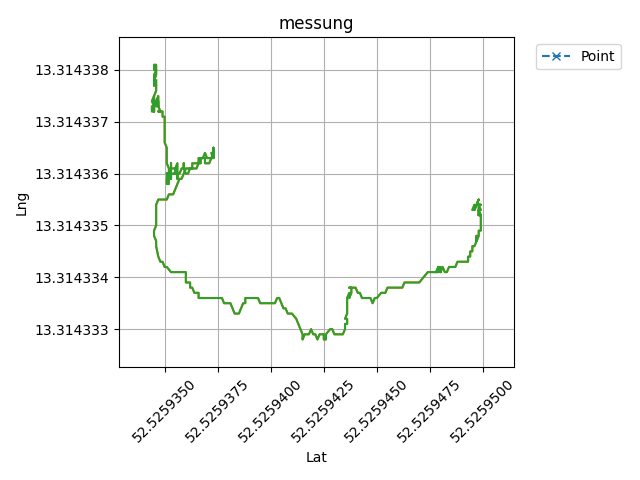

In [10]:
plots = []
for messpunkt in messpunkte:
    plots.append(add_widgets(messpunkt))